SyntaxError: invalid syntax (2171638234.py, line 6)

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp 
from scipy.stats import shapiro, ttest_ind, spearmanr, chi2_contingency
from sklearn.datasets import load_wine, make_classification
import warnings
warnings.filterwarnings("ignore")

In [4]:
wine = load_wine()

In [5]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [6]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["target"] = wine.target

In [7]:
data, target = make_classification(n_samples=400, n_features=5, n_classes=2)

In [8]:
df =pd.DataFrame(data, columns=[f"feature{i}" for i in range(1, 6)])
df["target"] = target

In [10]:
wine = wine_df.copy()

In [11]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-1.701905,-2.025044,-0.618761,0.640950,-1.349763,0
1,1.843755,2.080644,0.513941,0.238285,1.363847,1
2,-1.334561,-0.614484,0.859904,1.080704,-0.211962,0
3,0.912601,0.135665,-0.981180,-0.998123,-0.102466,1
4,-0.871201,-1.477504,-0.925949,0.701274,-1.074308,0


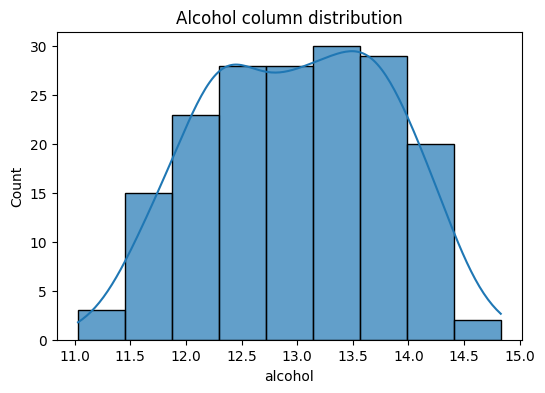

In [13]:
plt.figure(figsize=(6,4))
plt.title("Alcohol column distribution")
sns.histplot(wine["alcohol"], kde =True, alpha =0.7)      # kde = density instrument
plt.show()

In [14]:
# h0 -> data is normally distributed
# ha -> data is not normally distributed

# checking whether to accept the null hyphothesis or reject it.
sh_stat, sh_p = shapiro(wine["alcohol"])

print("shapiro statistical Value : ", sh_stat)
print("shapiro p_value:", sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed  (Acepting H0)")
else:
    print("Data is not normally distributes (Rejecting H0)")

shapiro statistical Value :  0.981804609298706
shapiro p_value: 0.020050711929798126
Data is not normally distributes (Rejecting H0)


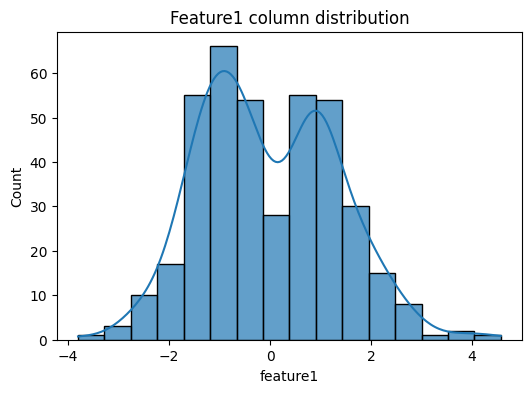

In [15]:

plt.figure(figsize=(6,4))
plt.title("Feature1 column distribution")
sns.histplot(df["feature1"], kde =True, alpha =0.7)
plt.show()

In [17]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

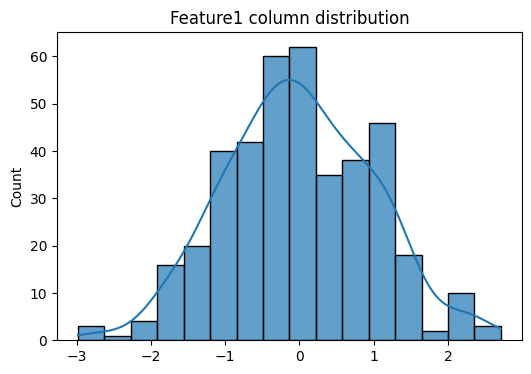

In [18]:
sample = np.random.normal(size = 400)
plt.figure(figsize=(6,4))
plt.title("Feature1 column distribution")
sns.histplot(sample, kde =True, alpha =0.7)
plt.show()

In [19]:
# h0 -> data is normally distributed
# ha -> data is not normally distributed

# checking whether to accept the null hyphothesis or reject it.
sh_stat, sh_p = shapiro(sample)

print("shapiro statistical Value : %.5f" %sh_stat)
print("shapiro p_value: %.5f" %sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed  (Acepting H0)")
else:
    print("Data is not normally distributes (Rejecting H0)")

shapiro statistical Value : 0.99713
shapiro p_value: 0.71271
Data is normally distributed  (Acepting H0)


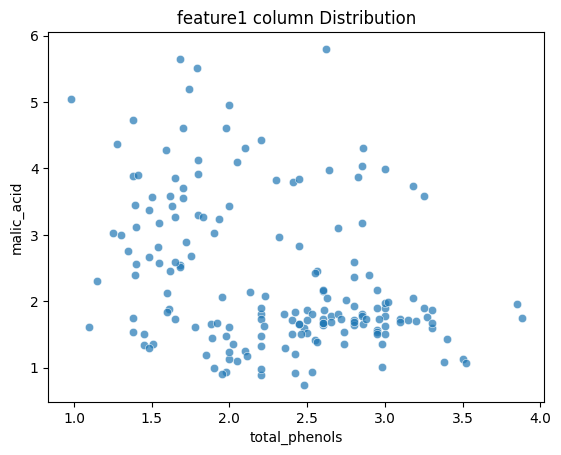

In [20]:
plt.title("feature1 column Distribution")
sns.scatterplot(x=wine["total_phenols"],y=wine["malic_acid"], alpha=0.7)
plt.show()

In [21]:
# h0 = total_phenol and malic acid are independent
# Ha = total phenol and malic acid are not independent

# checking whethere to accept or reject the null hyphthesis
# spearmenr
sp_stats, sp_p = spearmanr(wine["total_phenols"], wine["malic_acid"])

print("spearaman statistical value : %.5f" %sp_stats)
print("spearman p_value : %.5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("total_phenol and malic acid are independent (Acepting H0)")
else:
    print("total_phenol and malic acid  are not independent (Rejecting H0)")

spearaman statistical value : -0.28022
spearman p_value : 0.00015
total_phenol and malic acid  are not independent (Rejecting H0)


In [22]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-1.701905,-2.025044,-0.618761,0.640950,-1.349763,0
1,1.843755,2.080644,0.513941,0.238285,1.363847,1
2,-1.334561,-0.614484,0.859904,1.080704,-0.211962,0
3,0.912601,0.135665,-0.981180,-0.998123,-0.102466,1
4,-0.871201,-1.477504,-0.925949,0.701274,-1.074308,0


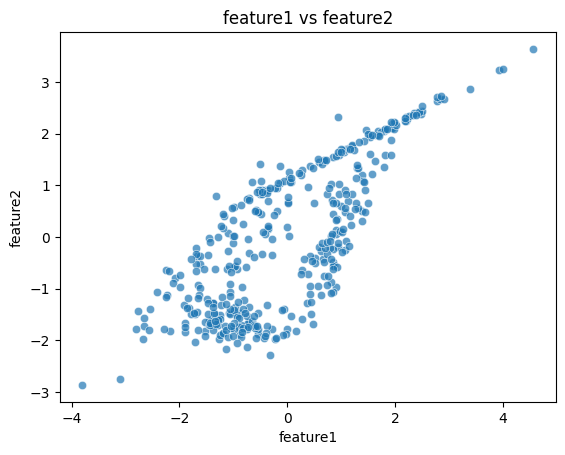

In [24]:
plt.title("feature1 vs feature2")
sns.scatterplot(x=df["feature1"],y=df["feature2"], alpha=0.7)
plt.show()

In [25]:
# h0 = feature1 and feature2 are dependent
# Ha = feature1 and feature2 are  independent

# checking whethere to accept or reject the null hyphthesis
# spearmenr
sp_stats, sp_p = spearmanr(df["feature1"], df["feature2"])

print("spearaman statistical value : %.5f" %sp_stats)
print("spearman p_value : %.5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("feature1 and feature2 are dependent (Acepting H0)")
else:
    print("feature1 and feature2 are independent (Rejecting H0)")

spearaman statistical value : 0.74077
spearman p_value : 0.00000
feature1 and feature2 are independent (Rejecting H0)


In [26]:
cat = pd.cut(wine["proanthocyanins"], bins = 4, labels=["A", "B", "C", "D"])
cat

0      C
1      B
2      D
3      C
4      B
      ..
173    A
174    B
175    B
176    B
177    B
Name: proanthocyanins, Length: 178, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

In [27]:
# sequestial --> descrete
# Numerical --> categorial

wine["proanthocyanins"]=cat
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,C,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,B,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,D,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,C,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,B,4.32,1.04,2.93,735.0,0


In [28]:
# plt.figure(figsize=(6,4))
# plt.title("proanthocyanins vs color intensity")
# sns.scatterplot(x=wine["proanthocyanins"], y=wine["color_intensity"])
# plt.show()

In [30]:
sample1 = wine["ash"].iloc[:25]
sample2 = wine["ash"].iloc[-25:]

len(sample1), len(sample2)

(25, 25)

In [31]:
# H0 --> sample1 and sample2 are equal
# Ha --> sample1 and sample2 are not equal

# checking weather to accept or reject the null hypothesis
t_stats, t_p = ttest_ind(sample1, sample2)

print("T Statistiacl value : %.5f"%t_stats)
print("p value for t test : %.5f"%t_p)

alpha = 0.05
if t_p > alpha:
    print("sample1 and sample2 are equal (Accepting H0)")
else:
    print("sample1 and sample2 are not equal (Rejecting H0)")

T Statistiacl value : 0.42966
p value for t test : 0.66937
sample1 and sample2 are equal (Accepting H0)


In [32]:
sample1.mean()

2.4744

In [33]:
sample2.mean()

2.452

In [34]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,C,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,B,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,D,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,C,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,B,4.32,1.04,2.93,735.0,0


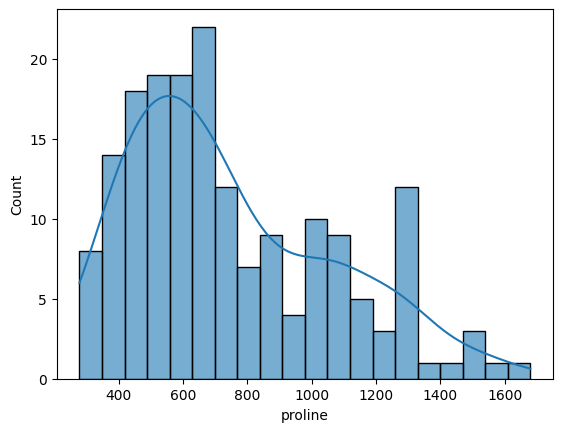

In [35]:
sns.histplot(x=wine["proline"], bins=20, alpha=0.6, legend=False, kde= True)
plt.show()

In [36]:
wine["proline"].mean()

746.8932584269663

In [37]:
sample1 = np.random.choice(wine["proline"], size=34)
sample2 = np.random.choice(wine["proline"], size=34)

In [38]:
# H0 --> sample1 and sample2 are not equal
# Ha --> sample1 and sample2 are not equal

t_stats, t_p = ttest_ind(sample1, sample2)

print("t-test statistical value : %.5f"%t_stats)
print("t-test p value : %.5f"%t_p)

alpha = 0.05
if t_p > alpha:
    print("sample1 and sample2 are equal (Accepting H0)")
else:
    print("sample1 and sample2 are not equal (Rejecting H0)")

t-test statistical value : 0.20869
t-test p value : 0.83533
sample1 and sample2 are equal (Accepting H0)


In [39]:
sample1.mean()

780.8235294117648

In [40]:
sample2.mean()

763.4705882352941

In [41]:
data = {
    "Gender":np.random.choice(["Male", "Female"], 80),
    "Subject":np.random.choice(["Med", "Eng"], 80)
}

In [43]:
course = pd.DataFrame(data)
course.head(10)

,Gender,Subject
0,Male,Med
1,Female,Med
2,Male,Med
3,Female,Eng
4,Male,Eng
5,Male,Eng
6,Male,Eng
7,Female,Med
8,Female,Med
9,Female,Eng


In [44]:
crstb = pd.crosstab(course["Gender"], course["Subject"])

In [45]:
# H0 --> More males doing Medical and Females doing Engineering
# Ha --> It is not true

chi_stat, chi_p, _, _ = chi2_contingency(crstb)

print("chi2 statistical value : %.5f"%chi_stat)
print("chi2 p value : %.5f"%chi_p)

alpha = 0.05
if chi_p > alpha:
    print("More males doing medical and female doing engineering (Accepting H0)")
else:
    print("Ir is not true (Rejecting H0)")

chi2 statistical value : 0.00000
chi2 p value : 1.00000
More males doing medical and female doing engineering (Accepting H0)
